In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel('cancer_classification.xlsx')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [7]:

x = data.drop('benign_0__mal_1' , axis=1)
y=data['benign_0__mal_1']


In [9]:
# Split the dataset 20%test 80%train
x_train, x_test, y_train, y_test = train_test_split(
    x, y,          
    test_size=0.2, 
    random_state=44 
)

In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)     


In [13]:
# Stratified K-Fold Cross-Validation on TRAINING DATA
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=44)
cv_scores = []
for fold, (train_idx, val_idx) in enumerate(skf.split(x_train_scaled, y_train), 1):
    X_tr, X_val = x_train_scaled[train_idx], x_train_scaled[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_tr, y_tr)
        y_pred_val = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred_val)
    cv_scores.append(acc)
    
    print(f"Fold {fold} Accuracy: {acc:.4f}")

print(f"\nAverage Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")


Fold 1 Accuracy: 0.9890
Fold 2 Accuracy: 0.9451
Fold 3 Accuracy: 0.9670
Fold 4 Accuracy: 0.9670
Fold 5 Accuracy: 0.9560

Average Cross-Validation Accuracy: 0.9648


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)



In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_test = final_knn.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred_test)
print("\nFinal Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))



Final Test Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



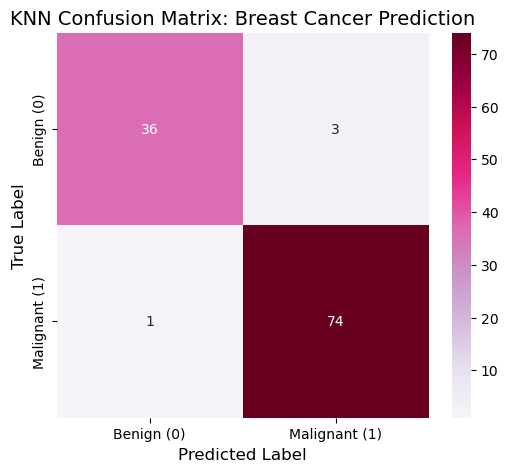

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)
classes = ['Benign (0)', 'Malignant (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('KNN Confusion Matrix: Breast Cancer Prediction', fontsize=14)
plt.show()
